In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/Dataset/Students/Student_performance_data.csv'
df = pd.read_csv(dataset_path)
df.head()

Mounted at /content/drive


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None
         StudentID 

In [ ]:
print(df.isnull().sum())
print(df[df.isnull().any(axis=1)])

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64
Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


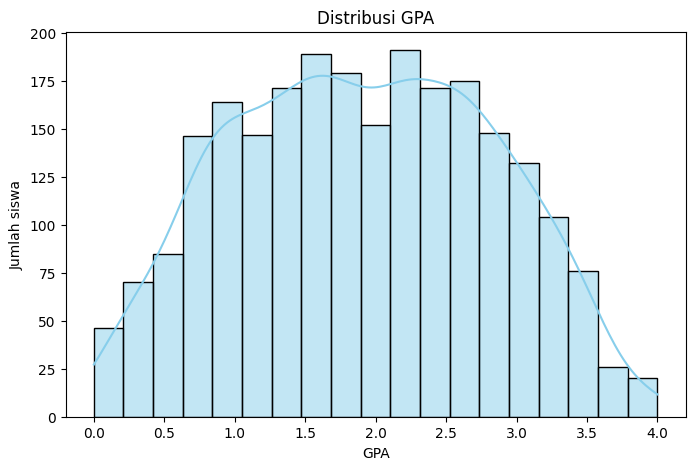

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['GPA'], kde=True, color='skyblue')
plt.title('Distribusi GPA')
plt.xlabel('GPA')
plt.ylabel('Jumlah siswa')
plt.show()

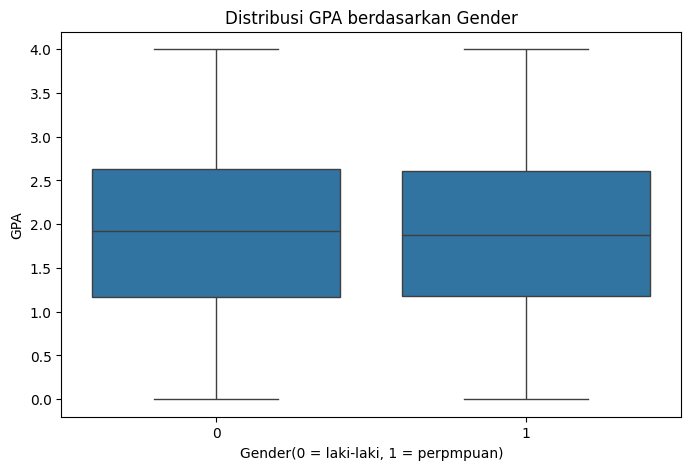

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender',y='GPA',data=df)
plt.title('Distribusi GPA berdasarkan Gender')
plt.xlabel('Gender(0 = laki-laki, 1 = perpmpuan)')
plt.ylabel('GPA')
plt.show()

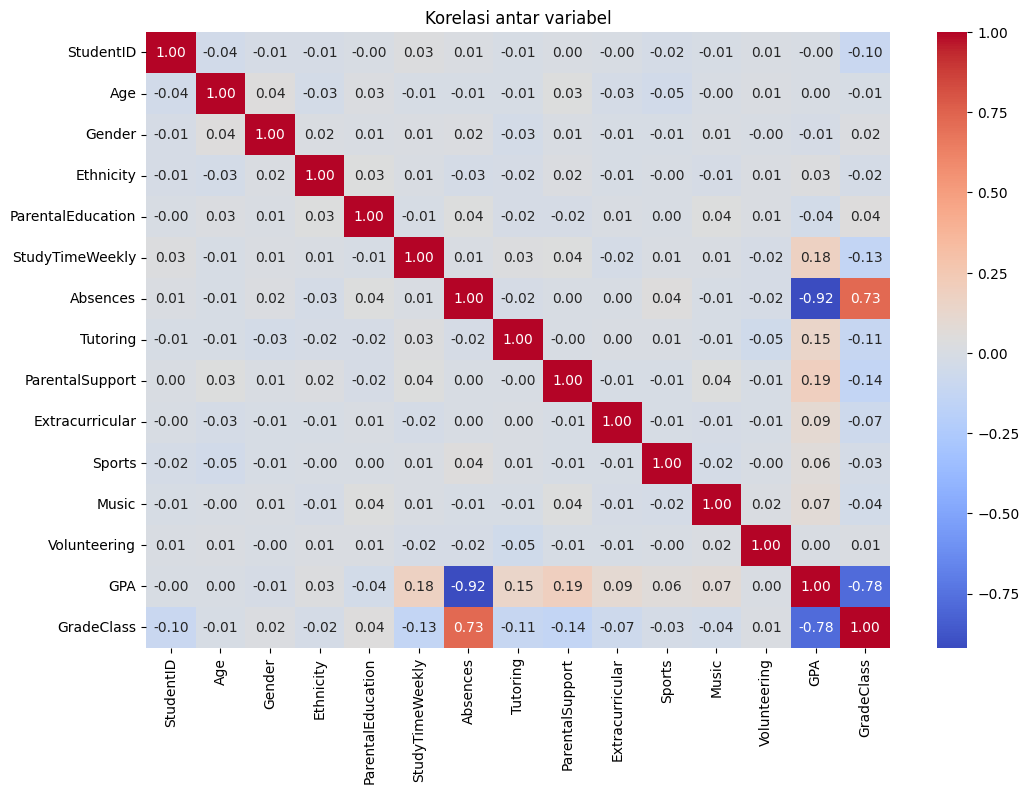

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot = True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar variabel')
plt.show()

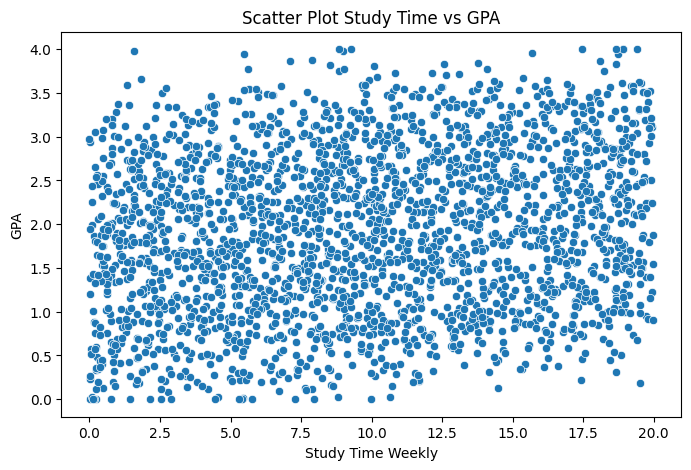

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='StudyTimeWeekly',y='GPA',data=df)
plt.title('Scatter Plot Study Time vs GPA')
plt.xlabel('Study Time Weekly')
plt.ylabel('GPA')
plt.show()

/tmp/ipython-input-9-2881859722.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GradeClass', data = df, palette='viridis')


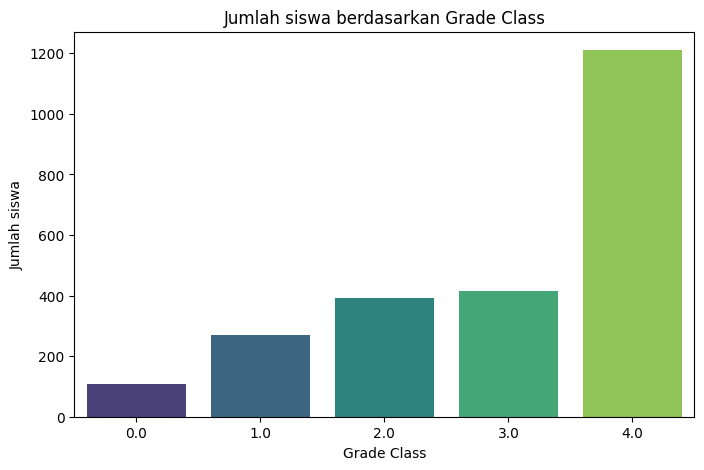

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='GradeClass', data = df, palette='viridis')
plt.title('Jumlah siswa berdasarkan Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Jumlah siswa')
plt.show()

In [ ]:
df[['StudyTimeWeekly','Absences','Tutoring','GradeClass','GPA']].head()

,StudyTimeWeekly,Absences,Tutoring,GradeClass,GPA
0,19.833723,7,1,2.0,2.929196
1,15.408756,0,0,1.0,3.042915
2,4.210570,26,0,4.0,0.112602
3,10.028829,14,0,3.0,2.054218
4,4.672495,17,1,4.0,1.288061


In [ ]:
X = df[['StudyTimeWeekly','Absences','Tutoring','GradeClass']]
y = df['GPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('Intercept : ', model.intercept_)
print('Koefisien : ', model.coef_)

Intercept :  3.192066884834367
Koefisien :  [ 0.02660295 -0.08658854  0.23301886 -0.11886111]


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print ('RMSE : ', rmse)
print ('R2 : ', r2)

RMSE :  0.28476535783399565
R2 :  0.9019372223971295


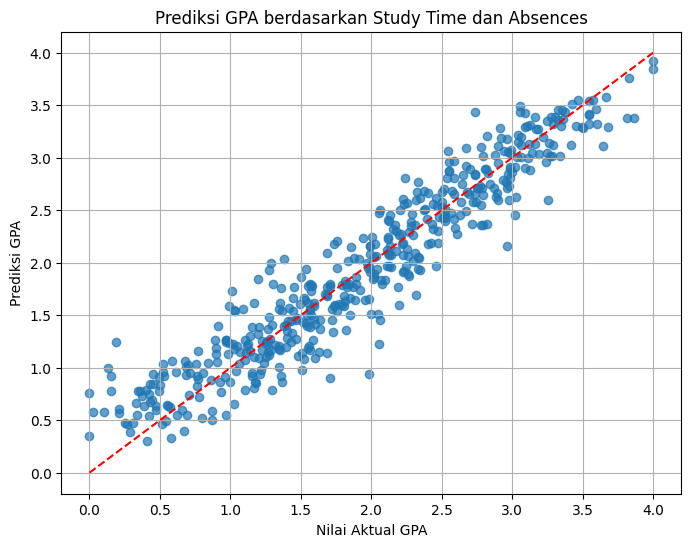

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Nilai Aktual GPA')
plt.ylabel('Prediksi GPA')
plt.title('Prediksi GPA berdasarkan Study Time dan Absences')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--')
plt.grid()
plt.show()

In [ ]:
def prediksi_gpa (studytime, absences, tutoring, gradeclass):
  intercept = 3.0512761494850533
  coef_studytime = 0.0307564
  coef_absence = -0.09918908
  coef_tutoring = 0.23301886
  coef_gradeclass = -0.11886111
  gpa = intercept + (coef_studytime * studytime) + (coef_absence * absences) + (coef_tutoring * tutoring) + (coef_gradeclass * gradeclass)
  return round (gpa,2)

studytime = float(input('Masukkan Study Time Weekly : '))
absences = float(input('Masukkan Jumlah Absences : '))
tutoring = float(input('Masukkan Jumlah Tutoring : '))
gradeclass = float(input('Masukkan Grade Class : '))
gpa_prediksi = prediksi_gpa (studytime, absences, tutoring, gradeclass)
print ('Prediksi GPA berdasarkan studytime, absences, tutoring dan gradeclass adalah : ', gpa_prediksi)

Masukkan Study Time Weekly : 19.833723
Masukkan Jumlah Absences : 7
Masukkan Jumlah Tutoring : 1
Masukkan Grade Class : 2.0
Prediksi GPA berdasarkan studytime, absences, tutoring dan gradeclass adalah :  2.96
